In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

<Axes: xlabel='Datetime'>

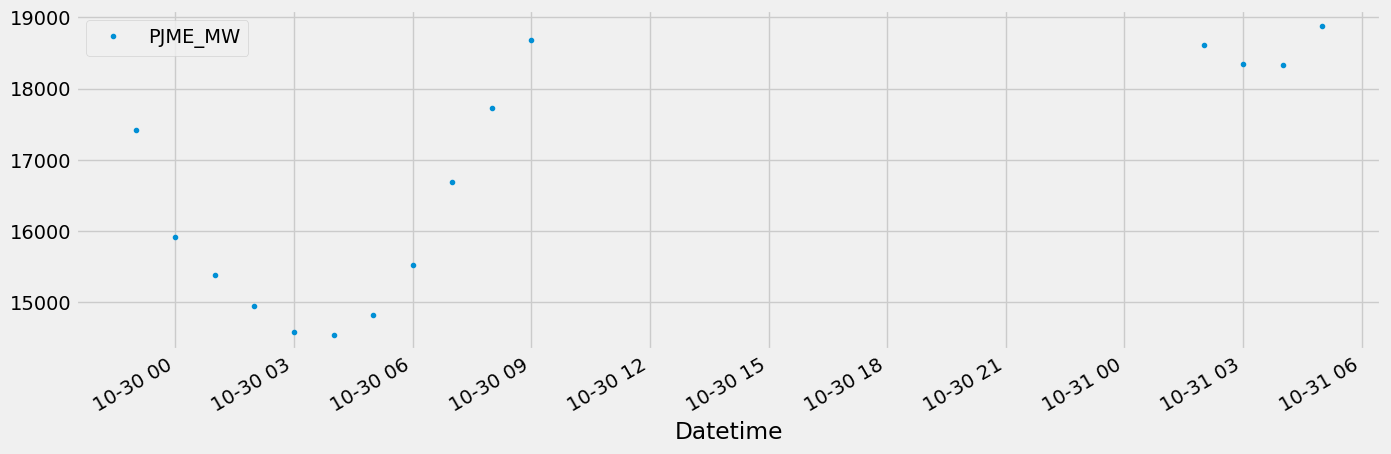

In [7]:
df.query('PJME_MW < 19000').plot(figsize=(15, 5), style='.')

In [8]:
df = df.query('PJME_MW > 19_000')

In [10]:
from sklearn.model_selection import TimeSeriesSplit

In [12]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()

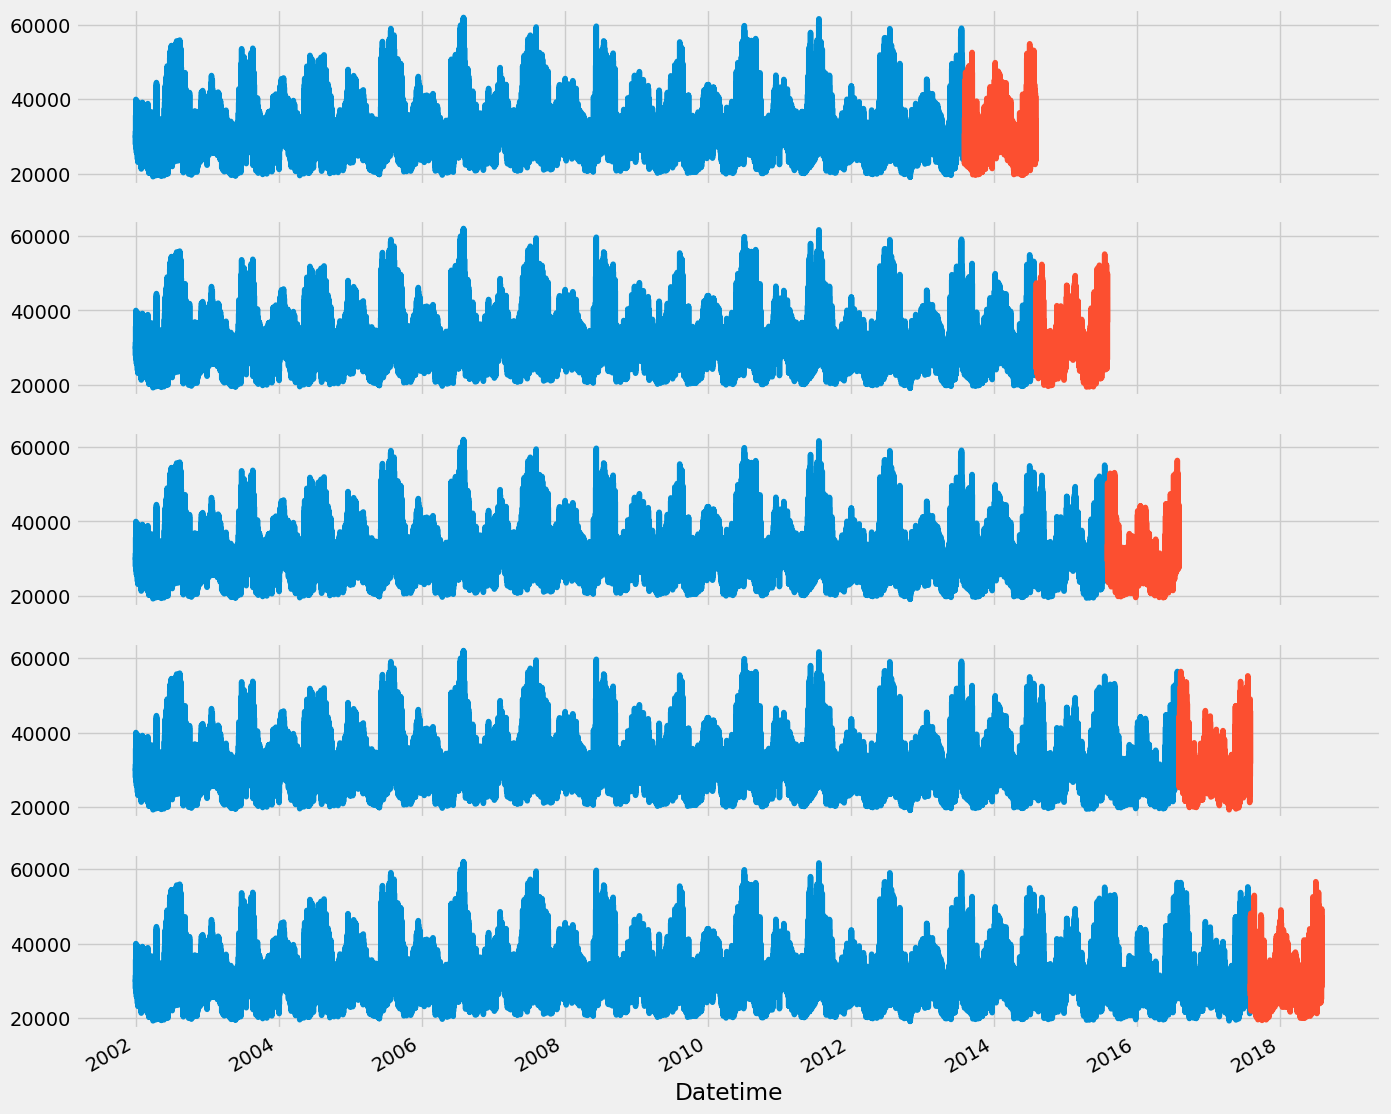

In [21]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['PJME_MW'].plot(ax=axs[fold])
    test['PJME_MW'].plot(ax=axs[fold])
    fold += 1

In [15]:
val_idx

array([101551, 101552, 101553, ..., 110308, 110309, 110310])

In [23]:
def add_lags(df):
    target_map = df['PJME_MW'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [24]:
df = add_lags(df)

In [26]:
df.tail()

,PJME_MW,lag1,lag2,lag3
Datetime,,,,
2018-08-02 20:00:00,44057.0,42256.0,41485.0,38804.0
2018-08-02 21:00:00,43256.0,41210.0,40249.0,38748.0
2018-08-02 22:00:00,41552.0,39525.0,38698.0,37330.0
2018-08-02 23:00:00,38500.0,36490.0,35406.0,34552.0
2018-08-03 00:00:00,35486.0,33539.0,32094.0,31695.0
